In [134]:
!pip install statsmodels

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [137]:
t2_raw_df = pd.read_csv(r'C:\Users\cpelosi\OneDrive - Capgemini\Desktop\my_repos\case_study\raw_data\trans_transformed2.csv')
t1_raw_df = pd.read_csv(r'C:\Users\cpelosi\OneDrive - Capgemini\Desktop\my_repos\case_study\raw_data\trans_transformed1.csv')

In [138]:
t2_raw_df.rename(columns={'date': 'time'}, inplace=True)

In [139]:
x = t1_raw_df['amt'].values
y = []

y.append(x[0])
for i in range(1,len(x)):
    y.append(x[i]+y[i-1])
bilancio = pd.DataFrame(y)

bilancio = pd.DataFrame(y)
t2_raw_df['balance'] = bilancio

In [140]:
t2_raw_df.set_index("time", inplace=True)

t2_raw_df.index = pd.to_datetime(data.index)

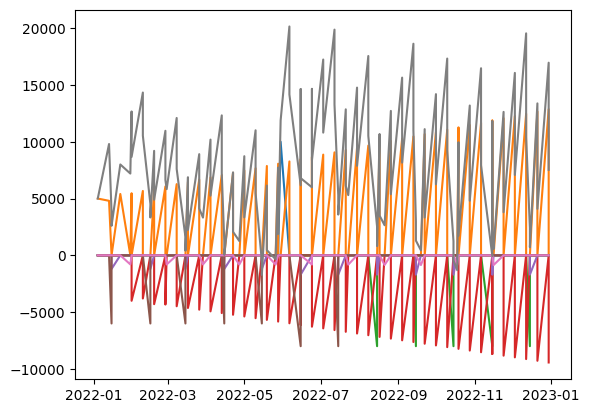

In [141]:
plt.plot(t2_raw_df, label="Dati reali")
plt.show()

loan_disbursement


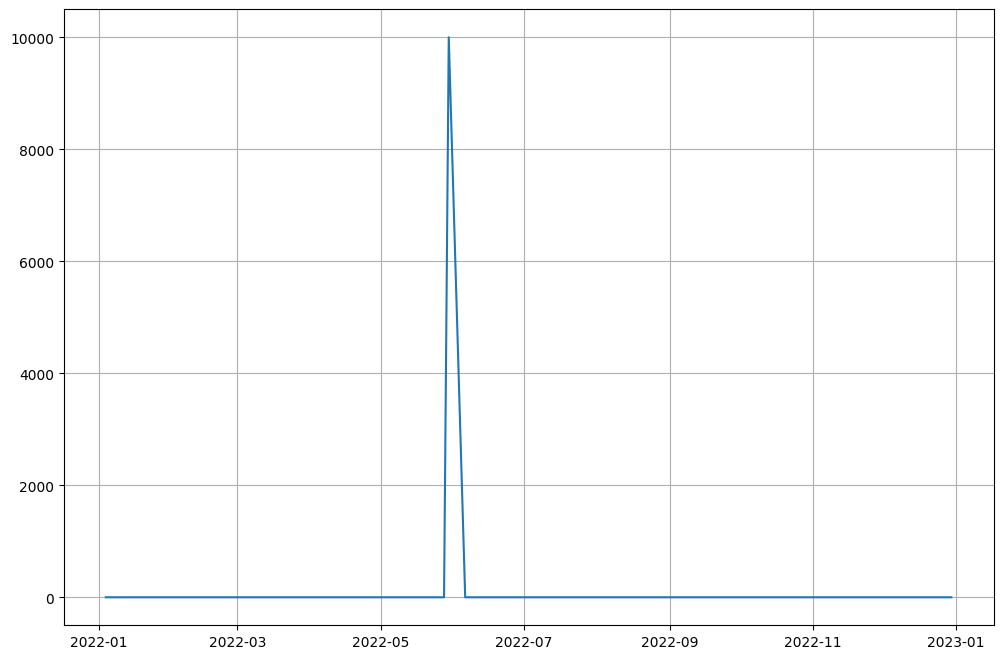

bill_incomes


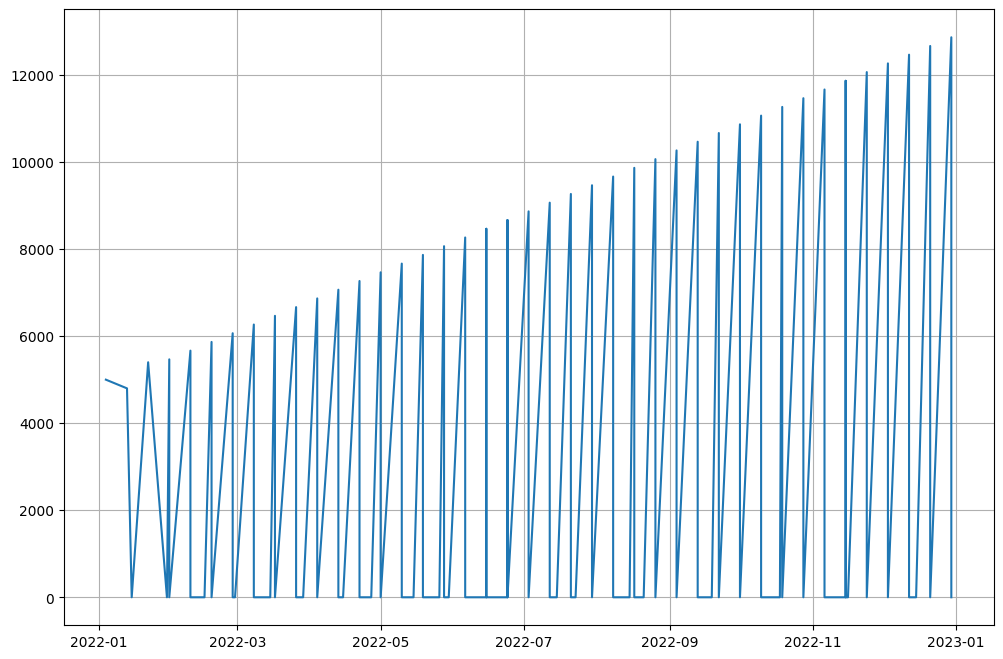

bill_outcomes


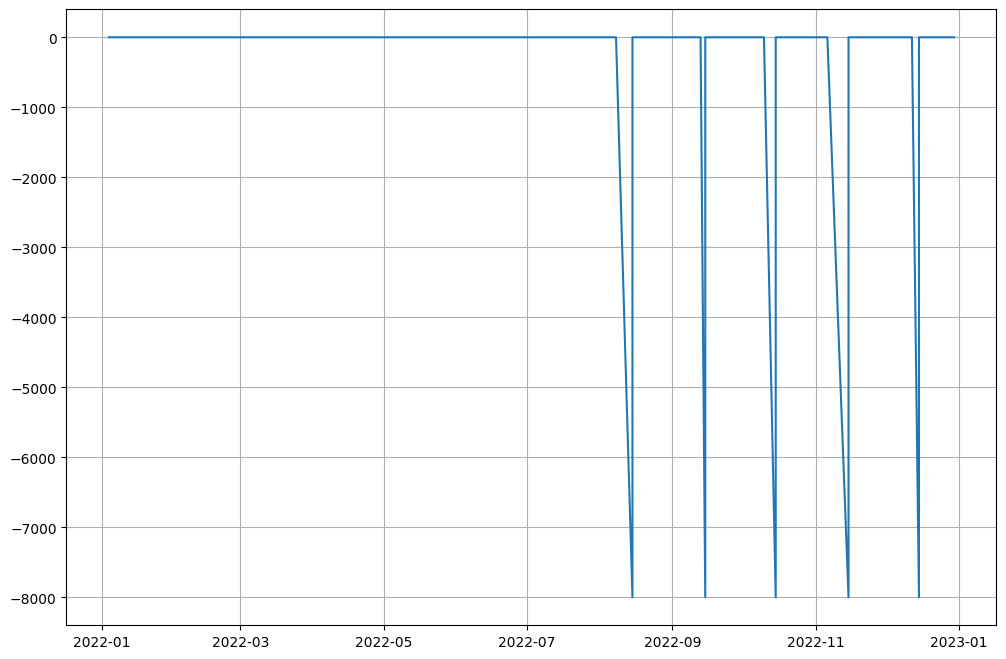

supplier_outcomes


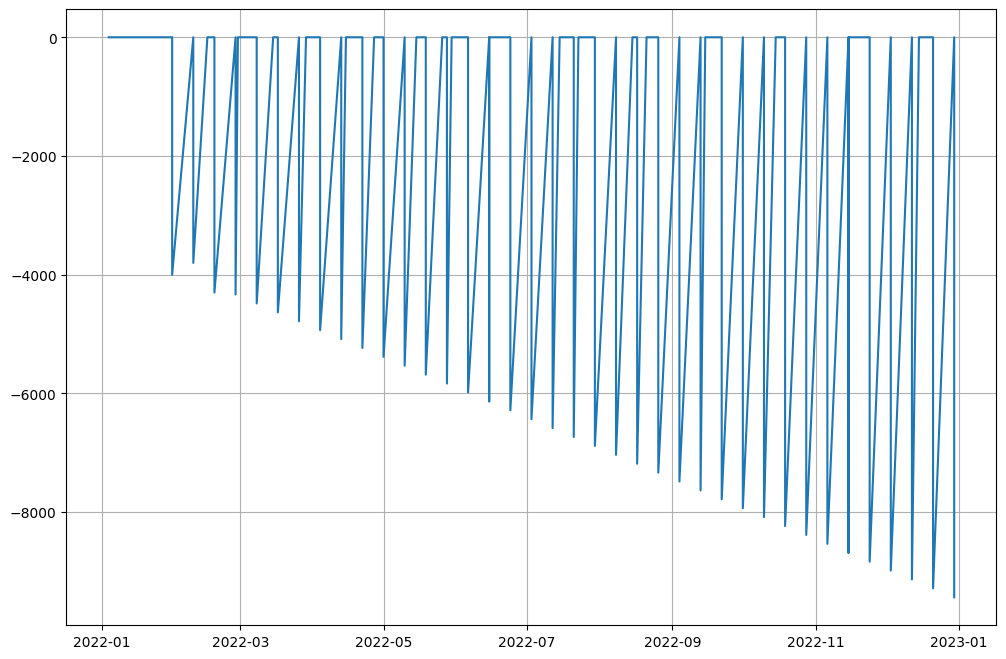

loan_repayments


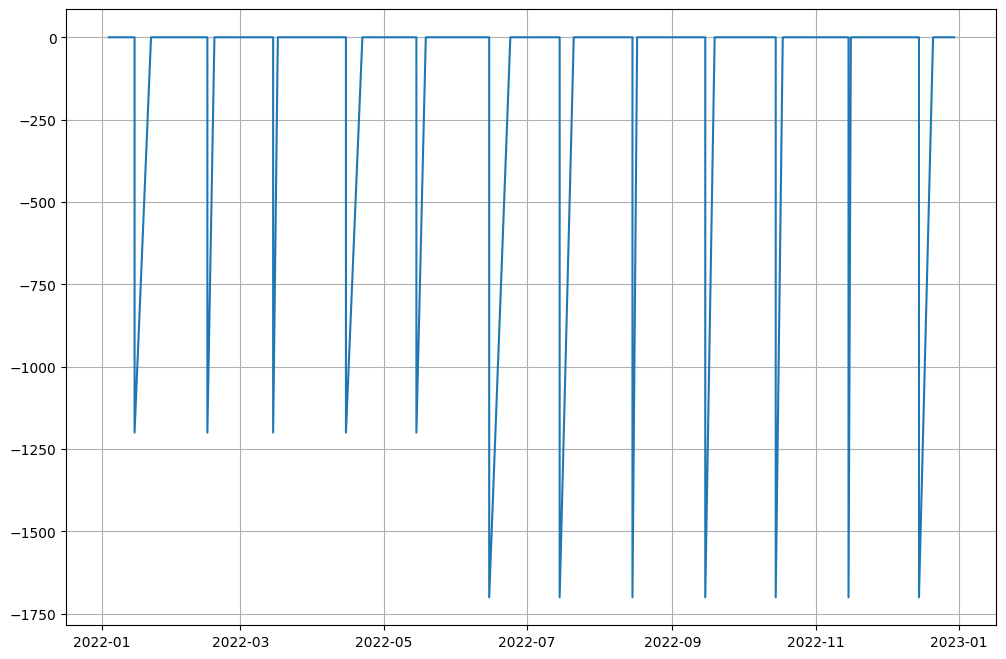

salaries


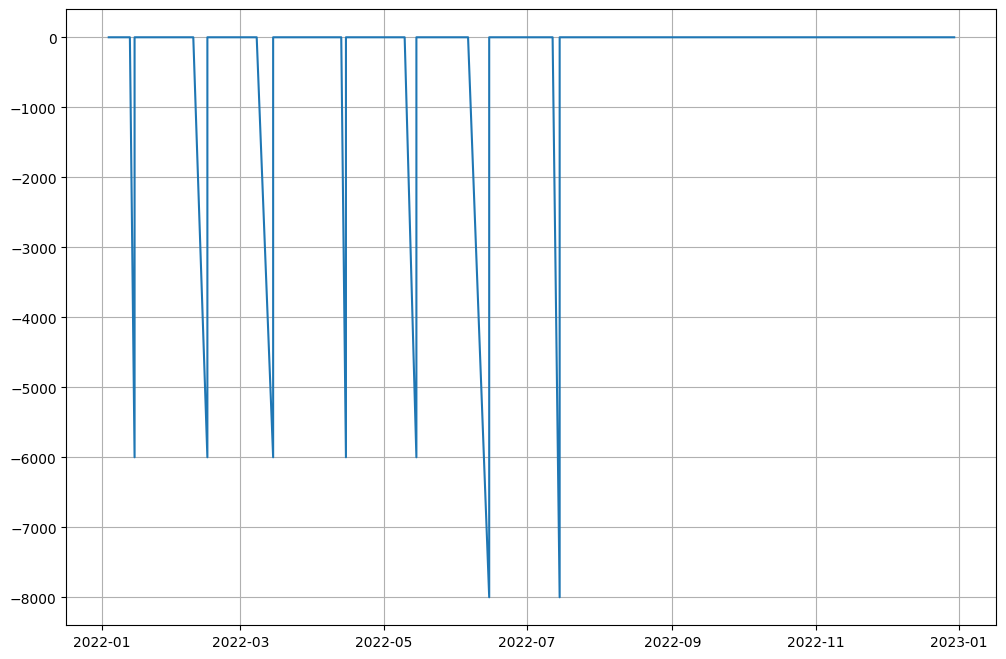

utilities


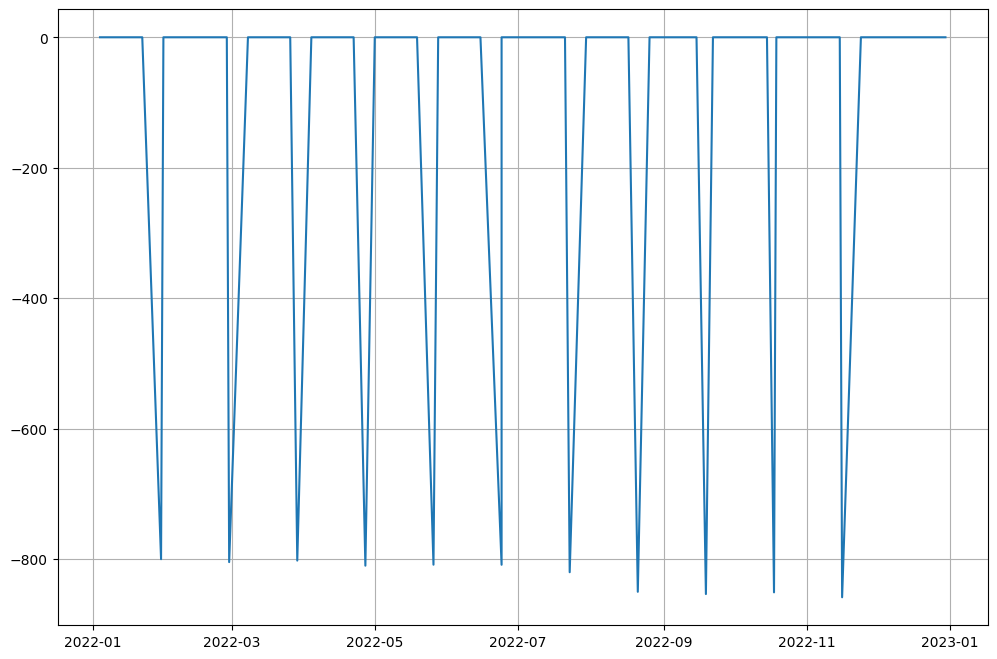

balance


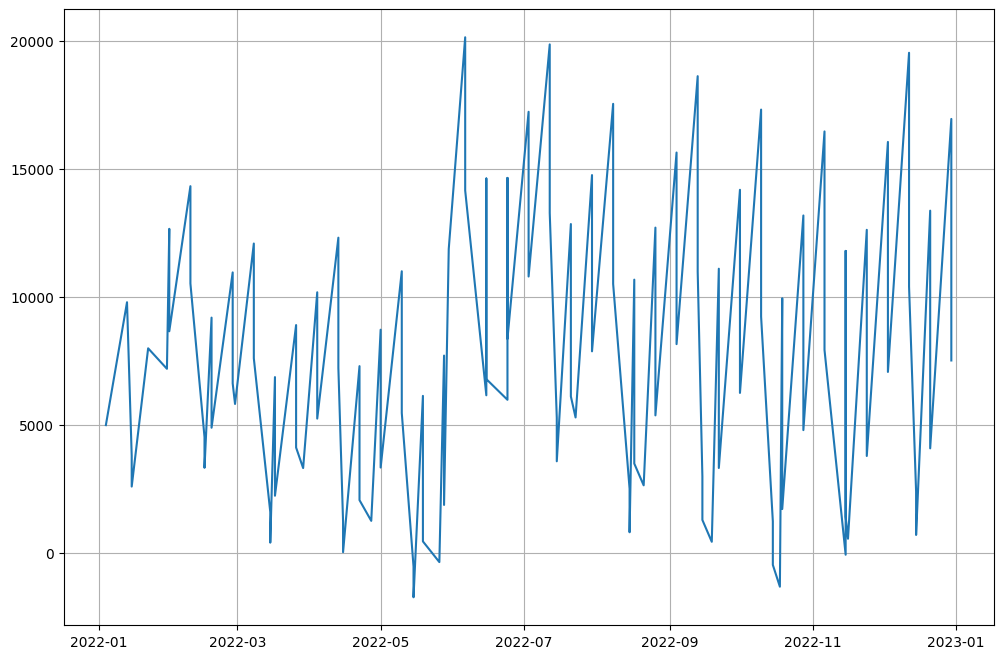

In [165]:
for col in t2_raw_df.columns:
    #plt.xlabel("time")
    print(col)
    plt.figure(figsize=(12,8))
    plt.plot(t2_raw_df[col])
    #plt.title(f'trend of {col}')
    #plt.xlabel('time')
    #plt.ylabel(col)
    #plt.title(f'trend of {col}')
    plt.grid(True)
    plt.show()


In [164]:
t2_raw_df.columns

Index(['loan_disbursement', 'bill_incomes', 'bill_outcomes',
       'supplier_outcomes', 'loan_repayments', 'salaries', 'utilities',
       'balance'],
      dtype='object')

In [171]:
model = ARIMA(t2_raw_df.balance, order=(1,1,0))

C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [172]:
model_fit = model.fit()

In [179]:
predictions = model_fit.predict(start=len(t2_raw_df.balance), end=len(t2_raw_df.balance)+11, typ="levels") # predictions for the next 12 months
data_test = t2_raw_df.balance[-12:]
error = mean_squared_error(data_test, predictions) # calculate the mean squared error
print("MSE: ", error)


MSE:  34854332.37493099


C:\Users\cpelosi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


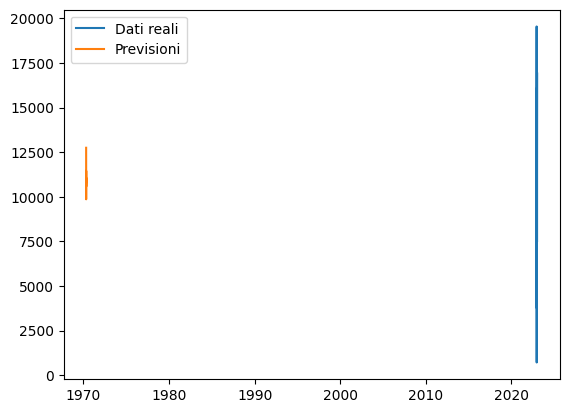

In [180]:
plt.plot(data_test, label="Dati reali")
plt.plot(predictions, label="Previsioni")
plt.legend()
plt.show()